#  Step: 1 Importing Required Libraries 

In [1]:
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Numpy and Pandas 

import pandas as pd
import numpy as np
from math import sqrt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error






# Step: 2 Reading and understanding the dataset

In [3]:
# Reading the data
bike_data = pd.read_csv("C:/Users/Neeraja/Downloads/day.csv")

In [4]:

# Checking the data
bike_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
# Information about the data
bike_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking the coulumns Names
print (bike_data.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [7]:
# Checking the data shape
bike_data.shape

(730, 16)

In [8]:
#  Describing the data
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking for null values 
bike_data.isnull().count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [10]:
# Checking for the duplicates
bike_data.drop_duplicates(subset=None, inplace=True)
bike_data.shape

(730, 16)

In [11]:
# There are 730 rows and 16 coulumns in our dataset 
# Hence there are no null values

In [12]:
# Checking the data size
bike_data.size

11680

In [13]:

# Checking the data types
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [14]:

# Axes Checking
bike_data.axes

[Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             720, 721, 722, 723, 724, 725, 726, 727, 728, 729],
            dtype='int64', length=730),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [15]:

# Dimension Check
bike_data.ndim

2

In [16]:
# Values Check
bike_data.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [17]:
# Finding the Outliers

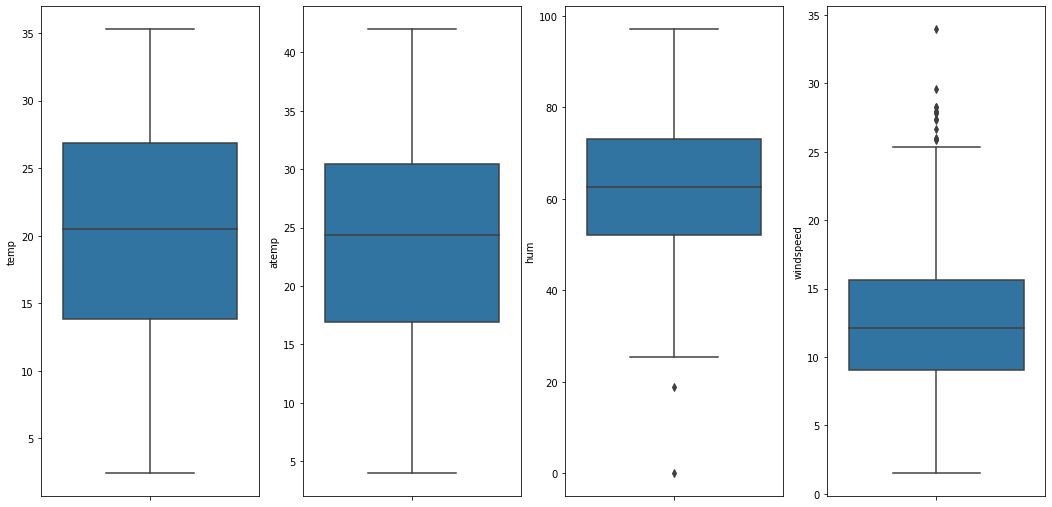

In [18]:
# Drawing the outliers for by using box plot for independent varibales with continuos values
    
cols = ['temp', 'atemp','hum','windspeed']
plt.figure(figsize=(18,9))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1


In [19]:
# From the plots w ecan observe that we don't have any outliers hence we can proceed with our data


# Step:3 Cleaning the data

## 3.1 Dropping the coulumns which are not necessary


In [20]:
### As instant is just a row instance identifier
### An index column we can drop it from the given data
### To avoid confusion in the dataset we can drop dteday as  dteday and yr have same information

bike_data.drop(['instant','dteday'], axis=1, inplace= True)

In [21]:
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [22]:
# As we know causual+ Registered is equal to cnt 
# AS have an idea about cnt is target variable
# Hence we won't consider casual and registered 
# hence we drop causual and registered columns

bike_data.drop(['casual','registered'], axis=1, inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
# Information about the data
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [24]:
bike_data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [25]:
bike_data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

# 3.2 Handling Missing values

In [26]:
# However we have alredy seen that we don't have missing values
# Let have a rechcek 
count = bike_data.isnull().sum()
print(count)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


#### Inference: No Null Values


# Step:4 Exploratory Data Analysis

## 4.1 Converting Season , weekday, weatherist, mnth in to caterogical values

In [27]:
## Now in our dataset we can observe that: yr, mnth, season, holiday, weekday, workingday, weathersit are all categorical variables
## Hence based on our data set web can replace weathersit, weekday and season with appropriate values

# Replacing the season
bike_data['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bike_data.head(5)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
# Replacing the weekday
bike_data['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",4:"Thursday", 5:"Friday",6:"Saturday"}, inplace=True)
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [29]:
# Replacing the weathersit

bike_data['weathersit'].replace({1:"Clear_few clouds", 2:"Mist_cloudy", 3:"Light rain_light snow_Thunderstorm", 4:"Heavy Rain_Ice Pallets_Thunderstorm_Mist"}, inplace=True)
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_few clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_few clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_few clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_few clouds,6.184153,7.54440,48.2917,14.958889,1321


In [30]:
# Replacing the month

bike_data['mnth'].replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace=True)
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_few clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thursday,1,Clear_few clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sunday,0,Clear_few clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Monday,1,Clear_few clouds,6.184153,7.54440,48.2917,14.958889,1321


In [31]:
# Checking after the conversion
([bike_data['season'].astype('category').value_counts()],[bike_data['weathersit'].astype('category').value_counts()],
[bike_data['weekday'].astype('category').value_counts()])



([fall      188
  summer    184
  spring    180
  winter    178
  Name: season, dtype: int64],
 [Clear_few clouds                      463
  Mist_cloudy                           246
  Light rain_light snow_Thunderstorm     21
  Name: weathersit, dtype: int64],
 [Monday       105
  Saturday     105
  Sunday       105
  Friday       104
  Thursday     104
  Tuesday      104
  Wednesday    103
  Name: weekday, dtype: int64])

In [32]:
# Checking the dataFrame
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_few clouds,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [34]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## 4.2 To Understand the Numerical Values, plotting the PAIRPLOTS

<Figure size 1008x2088 with 0 Axes>

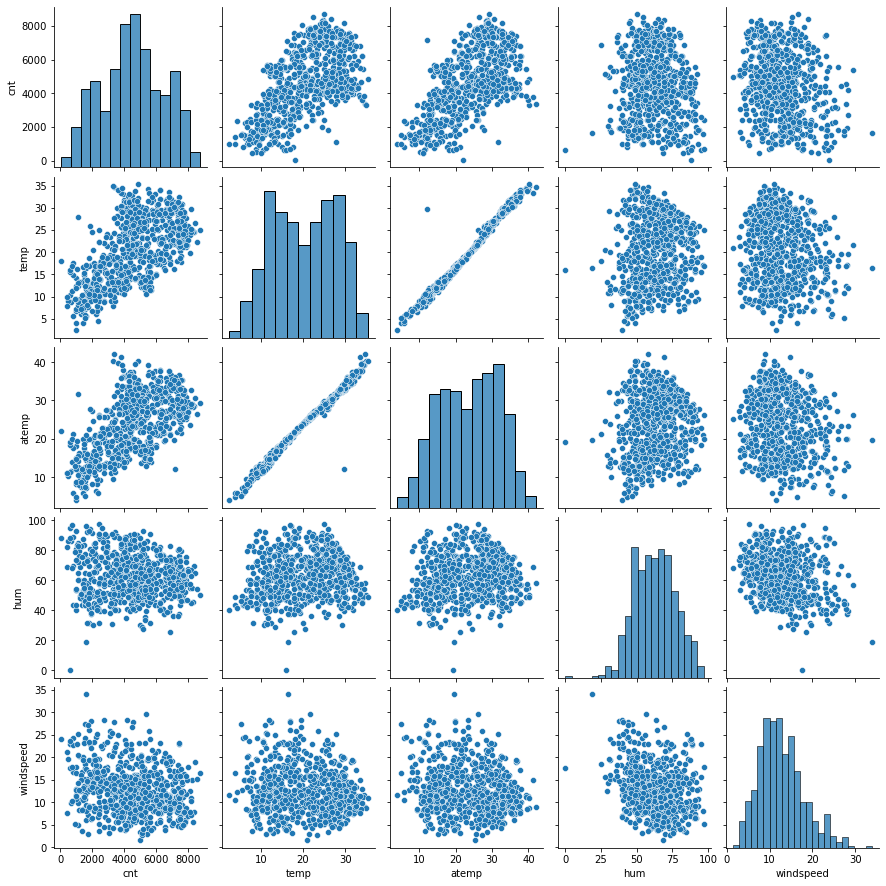

In [35]:

plt.figure(figsize = (14, 29))
sns.pairplot(bike_data, vars=['cnt','temp','atemp','hum',  'windspeed'])
plt.show()

# Inference:
###  .  Above plotting states that atemp and temp has highest correlation with cnt variable
###  . Temp and atemp has highest correlation

In [36]:
# AS we can see that from correlation map, output variance has a linear relationship with variables like atemp, temp

<Figure size 1440x1080 with 0 Axes>

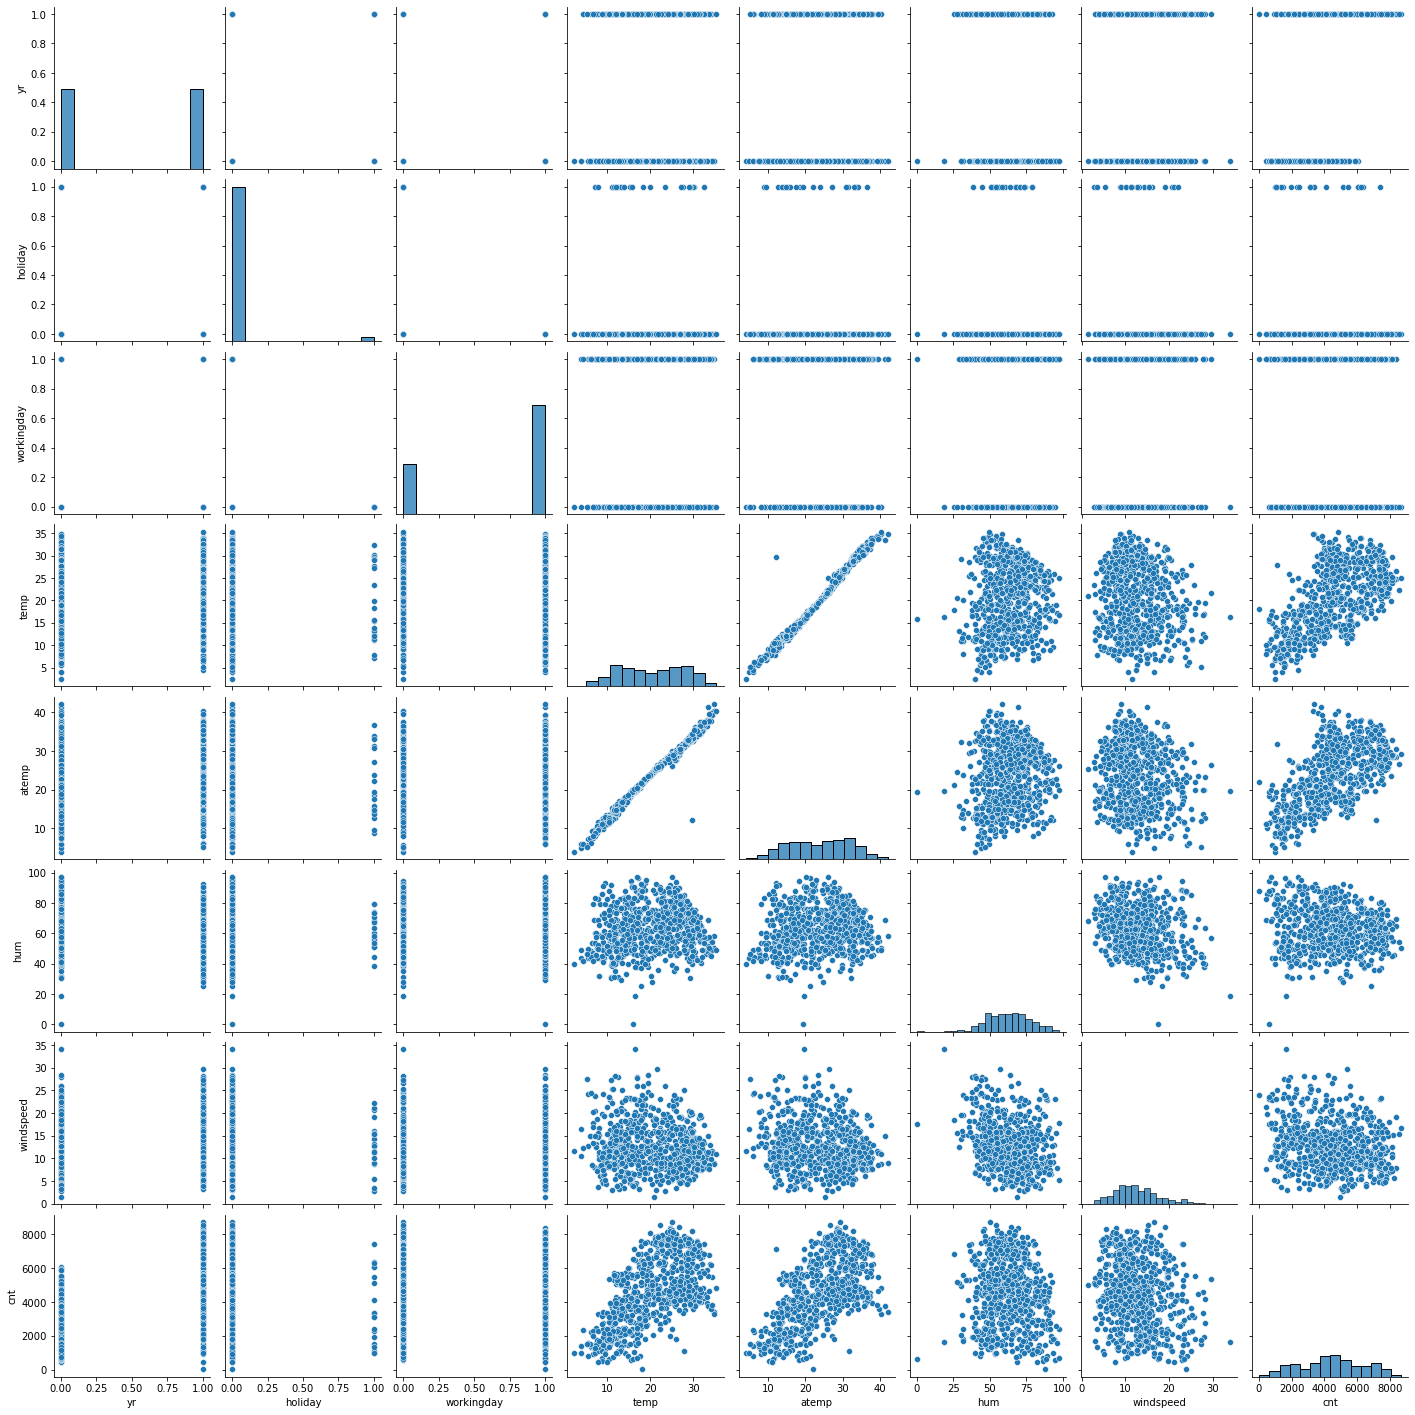

In [37]:
# Hence visulaizng the data between correlation and numerical values
plt.figure(figsize = (20, 15))
sns.pairplot(bike_data)
plt.show()

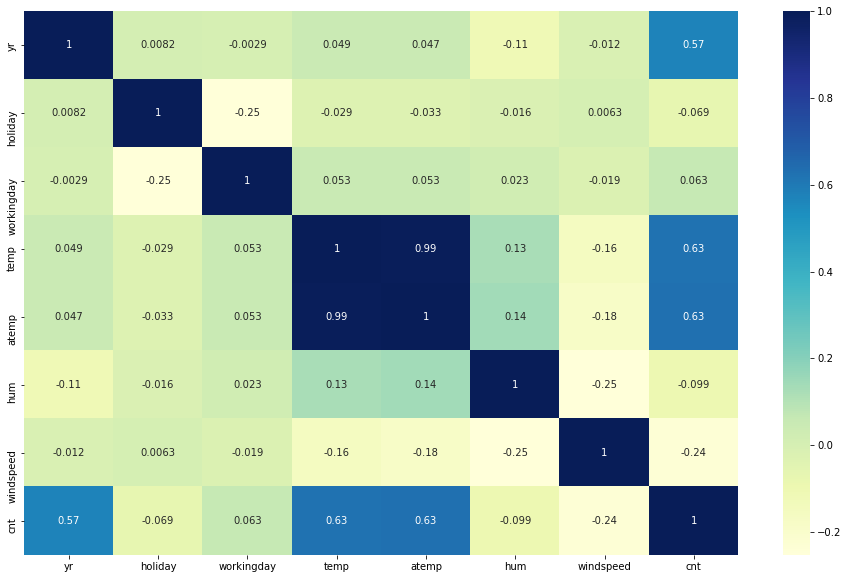

In [38]:
# From the above graphs  we can observe that atemp and temp having a relationship
# Hence checking the correlation

plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap = "YlGnBu")
plt.show()


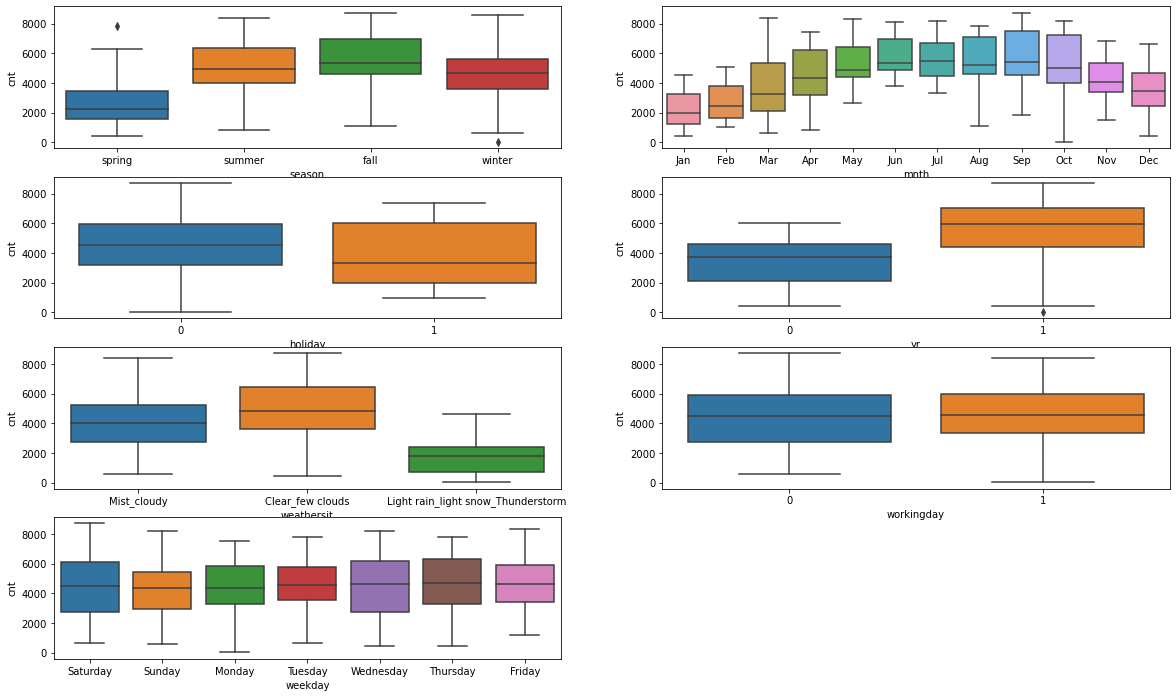

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(4,2,1)
sns.boxplot(x='season', y = 'cnt', data= bike_data)
plt.subplot(4,2,2)
sns.boxplot(x='mnth', y = 'cnt', data= bike_data)
plt.subplot(4,2,3)
sns.boxplot(x='holiday', y = 'cnt', data= bike_data)
plt.subplot(4,2,4)
sns.boxplot(x='yr', y = 'cnt', data= bike_data)
plt.subplot(4,2,5)
sns.boxplot(x='weathersit', y = 'cnt', data= bike_data)
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y = 'cnt', data= bike_data)
plt.subplot(4,2,7)
sns.boxplot(x='weekday', y = 'cnt', data= bike_data)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

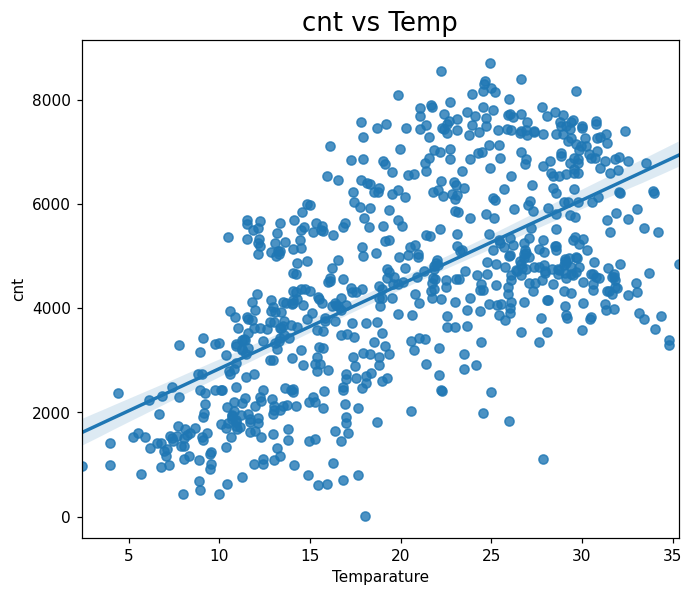

In [40]:
plt.figure(figsize=(7,6), dpi=110)
plt.title("cnt vs Temp", fontsize=17)
sns.regplot(data=bike_data, y ="cnt", x="temp")
plt.xlabel("Temparature")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

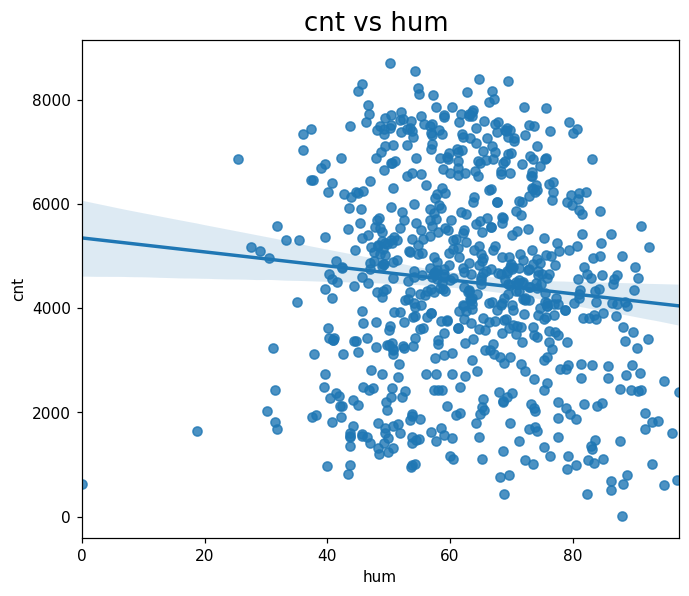

In [41]:


plt.figure(figsize=(7,6), dpi=110)
plt.title("cnt vs hum ", fontsize=17)
sns.regplot(data=bike_data, y ="cnt", x="hum")
plt.xlabel("hum")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

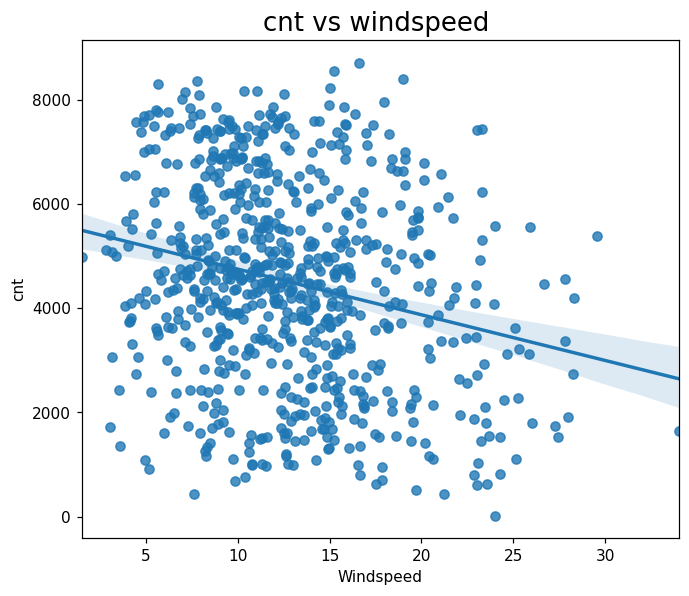

In [42]:
plt.figure(figsize=(7,6), dpi=110)
plt.title("cnt vs windspeed ", fontsize=17)
sns.regplot(data=bike_data, y ="cnt", x="windspeed")
plt.xlabel("Windspeed")
plt.show

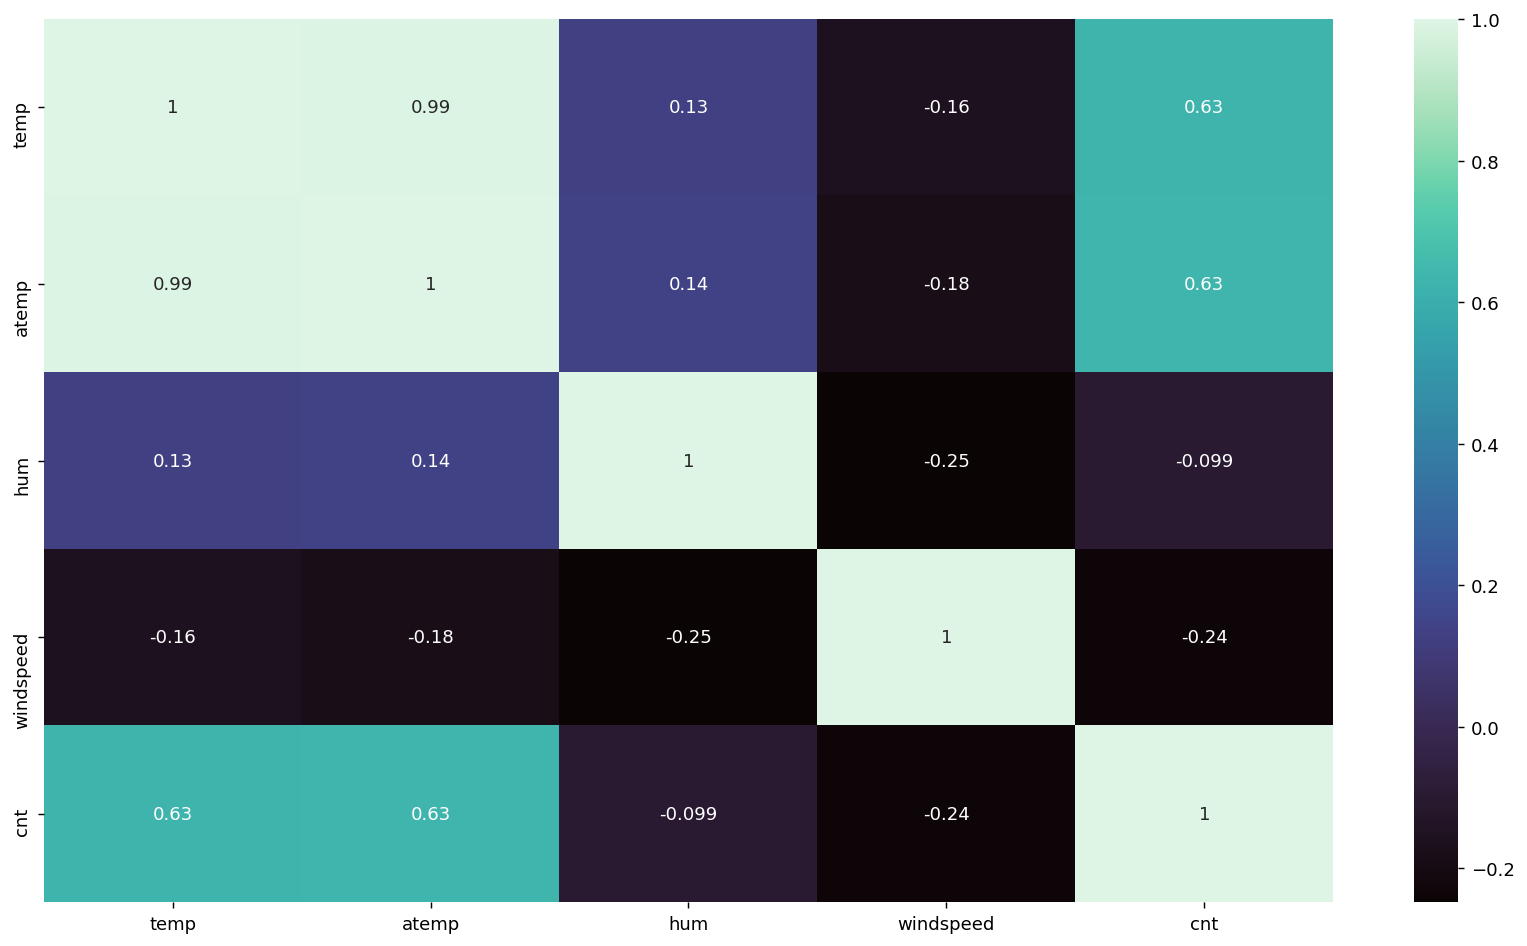

In [43]:
# Correlation for numeric
num_features = ['temp', 'atemp','hum','windspeed', 'cnt'] 
plt.figure(figsize=(16,9), dpi =130)
sns.heatmap(bike_data[num_features].corr(), annot=True, cmap="mako")
plt.show()

# Inference:

### . Temp and Atempare highly correlated
### . Hence we can remove one of them, but lets keep it for further analysis .
### . They are highly corelated With cnt variable 

In [44]:



# Having a look at our dataset before proceeding further
bike_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [45]:
bike_data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_few clouds,9.305237,11.46350,43.6957,12.522300,1600




# Step:5 Data Preparation for linear Regression

## 5.1 Creating the dummy variables for all caterogical value

In [46]:

bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [47]:
bike_data.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light rain_light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [48]:
bike_data.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 5.2 Having a look at our dataset before proceeding further


In [49]:
# Checking the shape before splitting
bike_data.shape

(730, 30)

In [50]:
# y to contain only target variable 
y = bike_data.pop('cnt')

# X is all remaining variables also contain our independent variable
X  = bike_data

# 5.3 Training and splitting the data

In [51]:
# Splitting in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape


(511, 29)

In [52]:
y_train.shape

(511,)

In [53]:
X_test.shape

(219, 29)

## 5.4 Feature Scaling Continuous Variable

In [54]:
#To make sure all features in same scale to  intercept easily

nums_vars = ['temp', 'atemp', 'hum','windspeed']

# Use Normalized Scaler to scale
scaler = MinMaxScaler()


#Fit and transform Training set only

X_train[nums_vars] = scaler.fit_transform(X_train[nums_vars])
X_train[nums_vars]

,temp,atemp,hum,windspeed
683,0.327133,0.322150,0.639330,0.327101
645,0.403972,0.404998,0.731215,0.419004
163,0.717562,0.685963,0.509660,0.708724
360,0.331287,0.326273,0.785745,0.415925
640,0.745598,0.682653,0.817947,0.110593
...,...,...,...,...
71,0.405237,0.395131,0.543468,0.621696
106,0.495350,0.481247,0.494203,0.704080
270,0.717562,0.651183,0.874624,0.316186
435,0.507811,0.499487,0.504079,0.464173


In [55]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0,0,1,...,0,0,0,0,0,1,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,0,0.405237,0.395131,0.543468,0.621696,1,0,0,...,0,0,0,0,1,0,0,0,0,0
106,0,0,0,0.495350,0.481247,0.494203,0.704080,0,1,0,...,0,0,0,0,1,0,0,0,0,0
270,0,0,1,0.717562,0.651183,0.874624,0.316186,0,0,1,...,0,1,0,0,0,0,0,1,0,1
435,1,0,1,0.507811,0.499487,0.504079,0.464173,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Afetr scaling 
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.230920,0.258317,0.250489,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.421834,0.438138,0.433719,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.000000,1.000000,0.500000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5.5 Building a model using that RFE and Automated Approcah 

In [57]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [59]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 10),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 4),
 ('mnth_May', False, 13),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light rain_light snow_Thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [60]:
# To get list of cloumns whcih are true
rfe_support_list = X_train.columns[rfe.support_]

rfe_support_list

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light rain_light snow_Thunderstorm',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [61]:
# 
X_train = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Nov', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light rain_light snow_Thunderstorm',
       'weathersit_Mist_cloudy']]

# 6. Model Building

## Model 1

In [62]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
683,1.0,1,0,1,0.327133,0.639330,0.327101,0,1,0,1,0,0,0,0,1
645,1.0,1,1,0,0.403972,0.731215,0.419004,0,1,0,0,0,0,0,0,1
163,1.0,0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0,0,0,0
360,1.0,0,0,1,0.331287,0.785745,0.415925,1,0,1,0,0,0,0,0,1
640,1.0,1,0,1,0.745598,0.817947,0.110593,0,1,0,0,0,0,0,0,1


In [63]:
# fitting the data
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                                            2584.195939
yr                                               1967.819873
holiday                                           198.024424
workingday                                        903.512899
temp                                             3137.672151
hum                                             -1231.601496
windspeed                                        -990.157903
season_spring                                   -1321.845941
season_winter                                     761.889146
mnth_Dec                                         -599.671869
mnth_Nov                                         -745.135789
mnth_Sep                                          523.896447
weekday_Saturday                                  940.480433
weekday_Sunday                                    542.178183
weathersit_Light rain_light snow_Thunderstorm   -1934.589149
weathersit_Mist_cloudy                           -476.439757
dtype: float64

In [64]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.81e-185
Time:                        10:56:11   Log-Likelihood:                -4128.6
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2584.1959    244.944     10.550      0.000    2102.940    3065.451
yr                                             1967.8199     71.338     27.584      0.000    1827.657    2107.982
holiday                                         198.0244    183.154      1.081      0.280    -161.829     557.878
workingday                                      903.5129     85.501     10.567      0.000     735.524    1071.502
temp                                           3137.6722    269.194     11.656      0.000    2608.771    3666.573
hum                                           -1231.6015    332.696     -3.702      0.000   -1885.269    -577.934
windspeed                                      -990.1579    207.584     -4.770      0.000   -1398.010    -582.306
season_spring                                 -1321.8459    139.661     -9.465      0.000   -1596.246   -1047.446
season_winter                                   761.8891    119.896      6.355      0.000     526.322     997.456
mnth_Dec                                       -599.6719    150.593     -3.982      0.000    -895.551    -303.792
mnth_Nov                                       -745.1358    158.973     -4.687      0.000   -1057.479    -432.793
mnth_Sep                                        523.8964    127.919      4.096      0.000     272.567     775.226
weekday_Saturday                                940.4804    103.919      9.050      0.000     736.305    1144.655
weekday_Sunday                                  542.1782    105.399      5.144      0.000     335.095     749.261
weathersit_Light rain_light snow_Thunderstorm -1934.5891    235.544     -8.213      0.000   -2397.375   -1471.803
weathersit_Mist_cloudy                         -476.4398     92.295     -5.162      0.000    -657.777    -295.103
==============================================================================
Omnibus:                       77.541   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.936
Skew:                          -0.789   Prob(JB):                     6.94e-41
Kurtosis:                       5.489   Cond. No.                     8.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.24e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
# VIF dataframe
X = X_train_sm
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                          feature       VIF
0                                           const  0.000000
1                                              yr  1.033089
2                                         holiday       inf
3                                      workingday       inf
4                                            temp  3.037380
5                                             hum  1.854091
6                                       windspeed  1.205214
7                                   season_spring  2.817533
8                                   season_winter  2.195151
9                                        mnth_Dec  1.269698
10                                       mnth_Nov  1.716745
11                                       mnth_Sep  1.090244
12                               weekday_Saturday       inf
13                                 weekday_Sunday       inf
14  weathersit_Light rain_light snow_Thunderstorm  1.285758
15                         weathersit_Mi

In [66]:
### AS we have infinity values we will be eliminating it manually 

In [67]:
X_train.drop(['holiday'],  axis=1, inplace= True)

## Model 2

In [68]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
683,1.0,1,1,0.327133,0.639330,0.327101,0,1,0,1,0,0,0,0,1
645,1.0,1,0,0.403972,0.731215,0.419004,0,1,0,0,0,0,0,0,1
163,1.0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0,0,0,0
360,1.0,0,1,0.331287,0.785745,0.415925,1,0,1,0,0,0,0,0,1
640,1.0,1,1,0.745598,0.817947,0.110593,0,1,0,0,0,0,0,0,1


In [69]:
# fitting the data
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                                            2782.220363
yr                                               1967.819873
workingday                                        705.488475
temp                                             3137.672151
hum                                             -1231.601496
windspeed                                        -990.157903
season_spring                                   -1321.845941
season_winter                                     761.889146
mnth_Dec                                         -599.671869
mnth_Nov                                         -745.135789
mnth_Sep                                          523.896447
weekday_Saturday                                  742.456009
weekday_Sunday                                    344.153759
weathersit_Light rain_light snow_Thunderstorm   -1934.589149
weathersit_Mist_cloudy                           -476.439757
dtype: float64

In [70]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.4
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.81e-185
Time:                        10:56:11   Log-Likelihood:                -4128.6
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     496   BIC:                             8351.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2782.2204    368.715      7.546      0.000    2057.785    3506.656
yr                                             1967.8199     71.338     27.584      0.000    1827.657    2107.982
workingday                                      705.4885    217.732      3.240      0.001     277.698    1133.279
temp                                           3137.6722    269.194     11.656      0.000    2608.771    3666.573
hum                                           -1231.6015    332.696     -3.702      0.000   -1885.269    -577.934
windspeed                                      -990.1579    207.584     -4.770      0.000   -1398.010    -582.306
season_spring                                 -1321.8459    139.661     -9.465      0.000   -1596.246   -1047.446
season_winter                                   761.8891    119.896      6.355      0.000     526.322     997.456
mnth_Dec                                       -599.6719    150.593     -3.982      0.000    -895.551    -303.792
mnth_Nov                                       -745.1358    158.973     -4.687      0.000   -1057.479    -432.793
mnth_Sep                                        523.8964    127.919      4.096      0.000     272.567     775.226
weekday_Saturday                                742.4560    231.873      3.202      0.001     286.881    1198.031
weekday_Sunday                                  344.1538    231.009      1.490      0.137    -109.724     798.031
weathersit_Light rain_light snow_Thunderstorm -1934.5891    235.544     -8.213      0.000   -2397.375   -1471.803
weathersit_Mist_cloudy                         -476.4398     92.295     -5.162      0.000    -657.777    -295.103
==============================================================================
Omnibus:                       77.541   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.936
Skew:                          -0.789   Prob(JB):                     6.94e-41
Kurtosis:                       5.489   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# VIF dataframe
X = X_train_sm
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                          feature         VIF
0                                           const  110.577492
1                                              yr    1.033089
2                                      workingday    8.534951
3                                            temp    3.037380
4                                             hum    1.854091
5                                       windspeed    1.205214
6                                   season_spring    2.817533
7                                   season_winter    2.195151
8                                        mnth_Dec    1.269698
9                                        mnth_Nov    1.716745
10                                       mnth_Sep    1.090244
11                               weekday_Saturday    5.596630
12                                 weekday_Sunday    5.614166
13  weathersit_Light rain_light snow_Thunderstorm    1.285758
14                         weathersit_Mist_cloudy    1.568621


### we will removing the fetaures which has vif values more than 5 manually 

In [72]:
X_train.drop(['weekday_Sunday'],  axis=1, inplace= True)

## Model 3

In [73]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Saturday,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
683,1.0,1,1,0.327133,0.639330,0.327101,0,1,0,1,0,0,0,1
645,1.0,1,0,0.403972,0.731215,0.419004,0,1,0,0,0,0,0,1
163,1.0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0,0,0
360,1.0,0,1,0.331287,0.785745,0.415925,1,0,1,0,0,0,0,1
640,1.0,1,1,0.745598,0.817947,0.110593,0,1,0,0,0,0,0,1


In [74]:
# fitting the data
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                                            3074.950765
yr                                               1966.397152
workingday                                        412.945605
temp                                             3134.195777
hum                                             -1232.603386
windspeed                                        -976.990729
season_spring                                   -1330.357195
season_winter                                     762.710965
mnth_Dec                                         -607.671716
mnth_Nov                                         -754.082835
mnth_Sep                                          523.434188
weekday_Saturday                                  449.764969
weathersit_Light rain_light snow_Thunderstorm   -1931.702576
weathersit_Mist_cloudy                           -474.475127
dtype: float64

In [75]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.8
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          5.93e-186
Time:                        10:56:11   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          3074.9508    312.378      9.844      0.000    2461.206    3688.696
yr                                             1966.3972     71.419     27.533      0.000    1826.076    2106.718
workingday                                      412.9456     94.177      4.385      0.000     227.912     597.979
temp                                           3134.1958    269.514     11.629      0.000    2604.669    3663.723
hum                                           -1232.6034    333.104     -3.700      0.000   -1887.068    -578.139
windspeed                                      -976.9907    207.650     -4.705      0.000   -1384.970    -569.011
season_spring                                 -1330.3572    139.715     -9.522      0.000   -1604.862   -1055.852
season_winter                                   762.7110    120.042      6.354      0.000     526.859     998.563
mnth_Dec                                       -607.6717    150.682     -4.033      0.000    -903.724    -311.619
mnth_Nov                                       -754.0828    159.054     -4.741      0.000   -1066.584    -441.581
mnth_Sep                                        523.4342    128.075      4.087      0.000     271.798     775.070
weekday_Saturday                                449.7650    123.304      3.648      0.000     207.504     692.026
weathersit_Light rain_light snow_Thunderstorm -1931.7026    235.824     -8.191      0.000   -2395.038   -1468.367
weathersit_Mist_cloudy                         -474.4751     92.399     -5.135      0.000    -656.015    -292.935
==============================================================================
Omnibus:                       79.834   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.610
Skew:                          -0.809   Prob(JB):                     2.47e-42
Kurtosis:                       5.526   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# VIF dataframe
X = X_train_sm
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                          feature        VIF
0                                           const  79.174202
1                                              yr   1.032904
2                                      workingday   1.592873
3                                            temp   3.037151
4                                             hum   1.854083
5                                       windspeed   1.203029
6                                   season_spring   2.812818
7                                   season_winter   2.195104
8                                        mnth_Dec   1.268084
9                                        mnth_Nov   1.714295
10                                       mnth_Sep   1.090238
11                               weekday_Saturday   1.578750
12  weathersit_Light rain_light snow_Thunderstorm   1.285671
13                         weathersit_Mist_cloudy   1.568301


<AxesSubplot:>

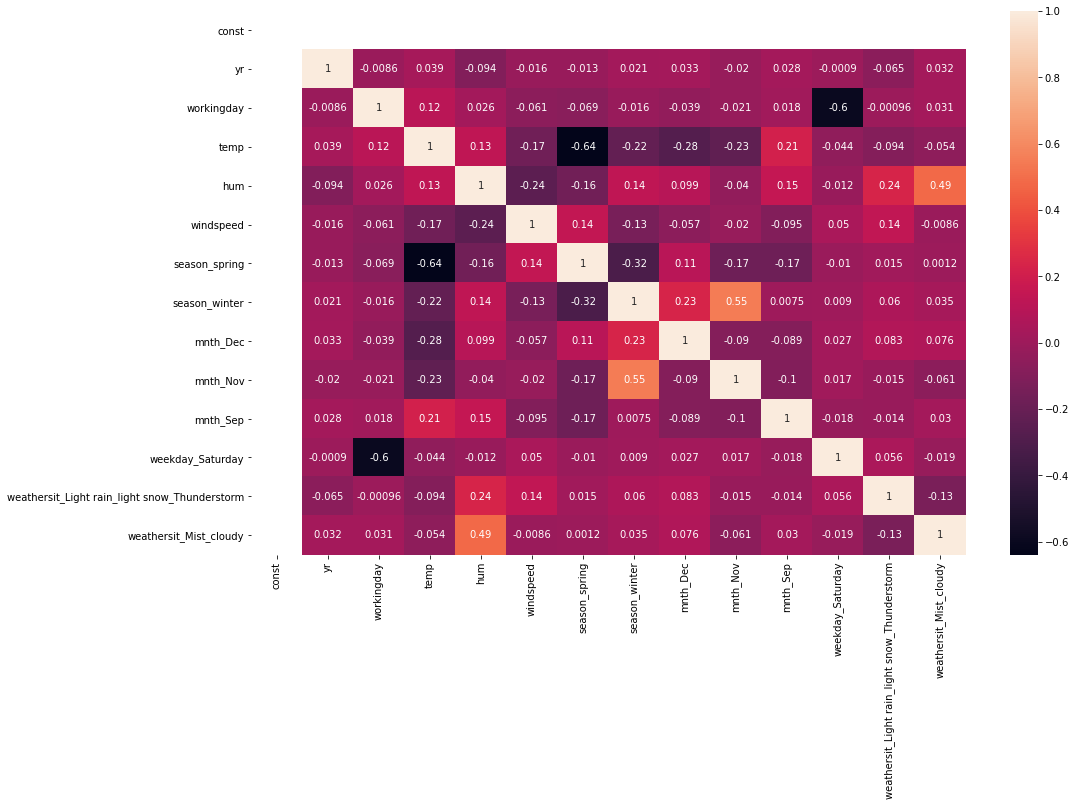

In [77]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train_sm.corr(),annot=True)

#### Weekday_saturday is not much important

In [78]:
X_train.drop(['weekday_Saturday'],  axis=1, inplace= True)

## Model 4

In [79]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weathersit_Light rain_light snow_Thunderstorm,weathersit_Mist_cloudy
683,1.0,1,1,0.327133,0.639330,0.327101,0,1,0,1,0,0,1
645,1.0,1,0,0.403972,0.731215,0.419004,0,1,0,0,0,0,1
163,1.0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0,0
360,1.0,0,1,0.331287,0.785745,0.415925,1,0,1,0,0,0,1
640,1.0,1,1,0.745598,0.817947,0.110593,0,1,0,0,0,0,1


In [80]:
# fitting the data
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                                            3312.026021
yr                                               1964.828778
workingday                                        206.817210
temp                                             3125.733813
hum                                             -1264.890065
windspeed                                        -975.646352
season_spring                                   -1360.330687
season_winter                                     748.883054
mnth_Dec                                         -599.600139
mnth_Nov                                         -748.470553
mnth_Sep                                          517.417590
weathersit_Light rain_light snow_Thunderstorm   -1868.622821
weathersit_Mist_cloudy                           -466.812134
dtype: float64

In [81]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     206.0
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          2.79e-184
Time:                        10:56:13   Log-Likelihood:                -4136.5
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     498   BIC:                             8354.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          3312.0260    309.294     10.708      0.000    2704.344    3919.708
yr                                             1964.8288     72.295     27.178      0.000    1822.788    2106.870
workingday                                      206.8172     76.263      2.712      0.007      56.980     356.655
temp                                           3125.7338    272.813     11.457      0.000    2589.727    3661.740
hum                                           -1264.8901    337.075     -3.753      0.000   -1927.154    -602.626
windspeed                                      -975.6464    210.199     -4.642      0.000   -1388.633    -562.660
season_spring                                 -1360.3307    141.186     -9.635      0.000   -1637.724   -1082.937
season_winter                                   748.8831    121.455      6.166      0.000     510.255     987.511
mnth_Dec                                       -599.6001    152.516     -3.931      0.000    -899.254    -299.946
mnth_Nov                                       -748.4706    161.000     -4.649      0.000   -1064.793    -432.148
mnth_Sep                                        517.4176    129.637      3.991      0.000     262.714     772.121
weathersit_Light rain_light snow_Thunderstorm -1868.6228    238.077     -7.849      0.000   -2336.383   -1400.863
weathersit_Mist_cloudy                         -466.8121     93.509     -4.992      0.000    -650.533    -283.092
==============================================================================
Omnibus:                       73.996   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.438
Skew:                          -0.774   Prob(JB):                     4.38e-37
Kurtosis:                       5.339   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# VIF dataframe
X = X_train_sm
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                                          feature        VIF
0                                           const  75.746715
1                                              yr   1.032866
2                                      workingday   1.019351
3                                            temp   3.036926
4                                             hum   1.852774
5                                       windspeed   1.203026
6                                   season_spring   2.803088
7                                   season_winter   2.192915
8                                        mnth_Dec   1.267811
9                                        mnth_Nov   1.714134
10                                       mnth_Sep   1.090057
11  weathersit_Light rain_light snow_Thunderstorm   1.278758
12                         weathersit_Mist_cloudy   1.567490


<AxesSubplot:>

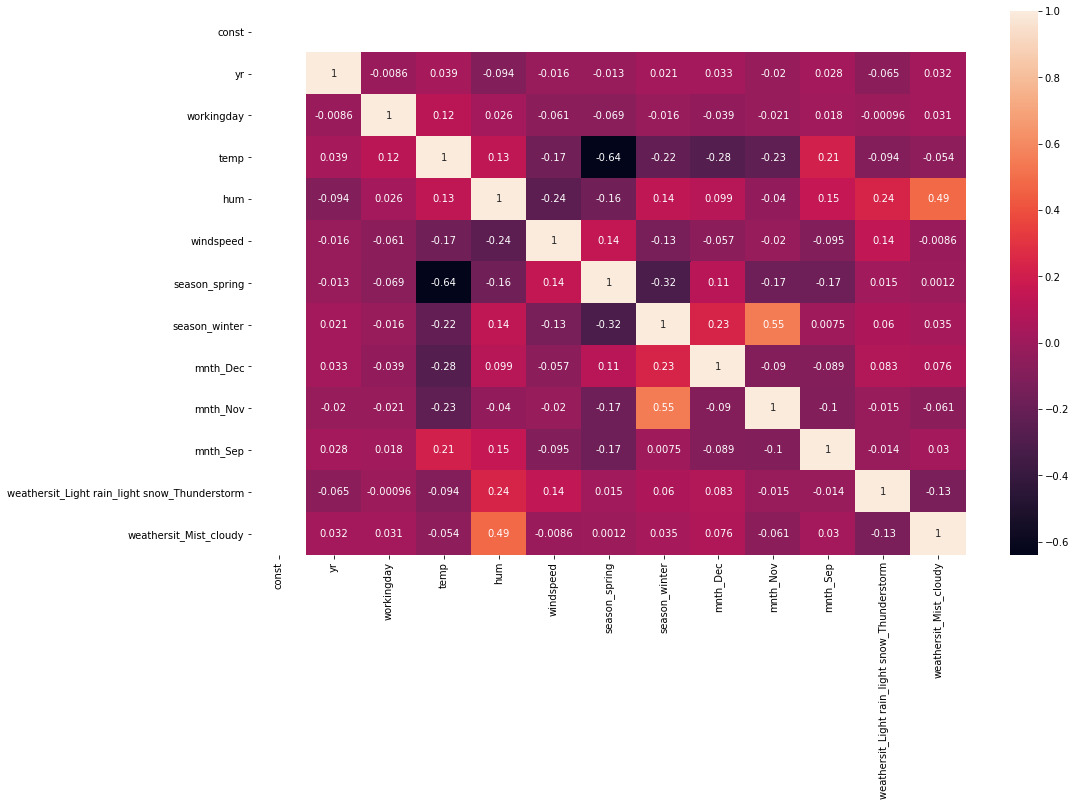

In [83]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train_sm.corr(),annot=True)

### Based on above correlation we can drop weathersit_Light rain_light snow_Thunderstorm

In [84]:
X_train.drop(['weathersit_Light rain_light snow_Thunderstorm'],  axis=1, inplace= True)

## Model 6

In [85]:
# training the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weathersit_Mist_cloudy
683,1.0,1,1,0.327133,0.639330,0.327101,0,1,0,1,0,1
645,1.0,1,0,0.403972,0.731215,0.419004,0,1,0,0,0,1
163,1.0,0,1,0.717562,0.509660,0.708724,0,0,0,0,0,0
360,1.0,0,1,0.331287,0.785745,0.415925,1,0,1,0,0,1
640,1.0,1,1,0.745598,0.817947,0.110593,0,1,0,0,0,1


In [86]:
# fitting the data
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const                     3872.878897
yr                        1963.179173
workingday                 187.067895
temp                      3407.247416
hum                      -2343.726592
windspeed                -1366.280716
season_spring            -1295.907957
season_winter              744.058302
mnth_Dec                  -622.531950
mnth_Nov                  -659.736728
mnth_Sep                   556.459237
weathersit_Mist_cloudy    -214.300770
dtype: float64

In [87]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     195.3
Date:                Thu, 16 Dec 2021   Prob (F-statistic):          7.04e-173
Time:                        10:56:15   Log-Likelihood:                -4166.3
No. Observations:                 511   AIC:                             8357.
Df Residuals:                     499   BIC:                             8407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3872.8789    318.677     12.153      0.000    3246.766    4498.992
yr                      1963.1792     76.559     25.643      0.000    1812.761    2113.597
workingday               187.0679     80.718      2.318      0.021      28.479     345.657
temp                    3407.2474    286.397     11.897      0.000    2844.554    3969.941
hum                    -2343.7266    325.931     -7.191      0.000   -2984.092   -1703.361
windspeed              -1366.2807    216.268     -6.318      0.000   -1791.189    -941.372
season_spring          -1295.9080    149.261     -8.682      0.000   -1589.165   -1002.650
season_winter            744.0583    128.618      5.785      0.000     491.359     996.758
mnth_Dec                -622.5319    161.483     -3.855      0.000    -939.801    -305.262
mnth_Nov                -659.7367    170.075     -3.879      0.000    -993.889    -325.585
mnth_Sep                 556.4592    137.183      4.056      0.000     286.932     825.986
weathersit_Mist_cloudy  -214.3008     92.979     -2.305      0.022    -396.980     -31.622
==============================================================================
Omnibus:                       78.840   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.471
Skew:                          -0.879   Prob(JB):                     7.79e-34
Kurtosis:                       5.018   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Hence we can consider this as final model
## When tempearture is good there are high no of rental bikes 
## Hum and windspeed is high count is less
## sat and  has high sales of bike rental
## temp has high correlation and taking bike rental demand is going high are good at that time
## spring , mnth _nov and mnth_dec has  there are less demand 
## mnth_sep, season winter has bit demand of bikes


In [88]:
# VIF dataframe
X = X_train_sm
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                   feature        VIF
0                    const  71.703641
1                       yr   1.032857
2               workingday   1.018241
3                     temp   2.984434
4                      hum   1.544687
5                windspeed   1.135581
6            season_spring   2.793614
7            season_winter   2.192859
8                 mnth_Dec   1.267345
9                 mnth_Nov   1.705682
10                mnth_Sep   1.088452
11  weathersit_Mist_cloudy   1.381943


# Inference : VIF is almost accepted henec it is less than 5 .
#           : P value for all features are 0.0 and R2 is 0.807
#           : Let us sleect this model as final model 
#           : As it has all important statiscts high(R -Square, Adjusted R-squared and F-statistics) along with no insignificant variables and no multi collinear (high VIF).
#           : Differnece betwen R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional paramters that can be removed from this model.


# 7.Testing and Prediction

## 7.1 Predict values for test data set


In [89]:
X_test[nums_vars] = scaler.transform(X_test[nums_vars])
X_test = X_test[['yr','workingday','temp','hum','windspeed','season_spring','season_winter','mnth_Dec','mnth_Nov','mnth_Sep','weathersit_Mist_cloudy']]

In [90]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)

In [91]:
y_pred_test = lr_model.predict(X_test_sm)

In [92]:
y_pred_train = lr_model.predict(X_train_sm)

## 7. 2 R-Squared value for test predictions


In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7936447848963739

In [94]:
r2_score(y_train, y_pred_train)

0.8115450165463978

### R2 value for predictions on test data (0.79) is almost same as R2 value of train data(0.811). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)



## 7.3 Model Evaluation
### Residual analysis 

Text(0.5, 0, 'Errors')

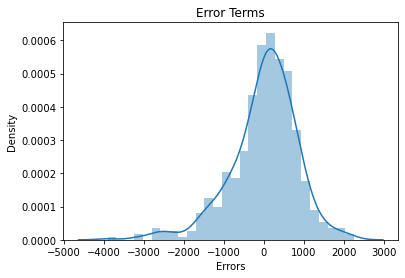

In [95]:
sns.distplot(y_train-y_pred_train)
plt.title('Error Terms')
plt.xlabel('Errors')

### Errors are normally distribured here with mean 0. So everything seems to be fine


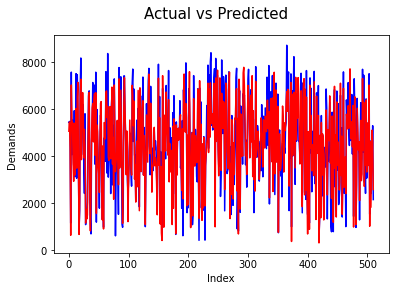

In [96]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_pred_train, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()


### Actual and Predicted result following almost the same pattern so this model seems ok


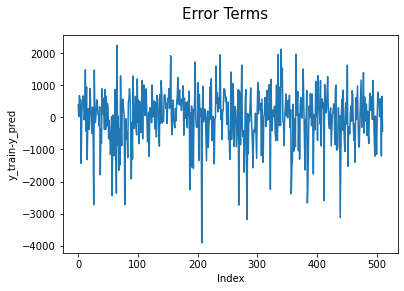

In [97]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_pred_train)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_pred')
plt.show()

## Based on above graph we can say error terms are independent to each other

## 7.4  Linearity Check

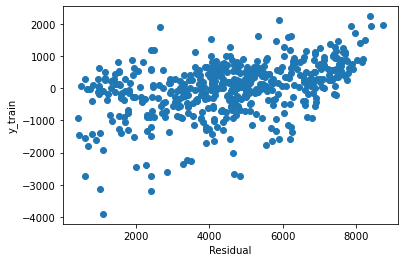

In [98]:
# scatter plot for the check
residual = (y_train - y_pred_train)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [99]:
X_test

,yr,workingday,temp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Nov,mnth_Sep,weathersit_Mist_cloudy
468,1,0,0.543115,0.518248,0.422104,0,0,0,0,0,0
148,0,0,0.758058,0.843709,0.479765,0,0,0,0,0,0
302,0,0,0.324018,0.642765,0.386287,0,1,0,0,0,0
355,0,1,0.453814,0.780592,0.062325,1,0,1,0,0,1
515,1,1,0.773634,0.507943,0.433030,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
332,0,1,0.497426,0.856161,0.590357,0,1,0,1,0,1
532,1,0,0.664605,0.617003,0.306856,0,0,0,0,0,0
558,1,1,0.838014,0.500644,0.146420,0,0,0,0,0,1
137,0,1,0.611648,0.896522,0.448592,0,0,0,0,0,1




## 7.5 Plot values vs Predicted values

In [100]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

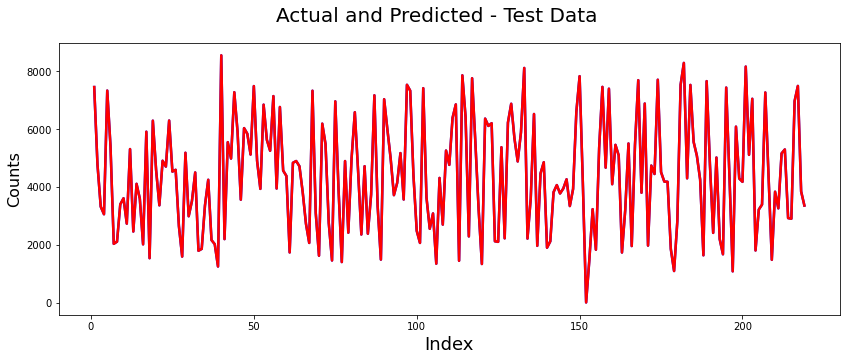

In [101]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test,len(y_test)+1,'Test Data')

## 7.6 Homoscedasticity


Text(0, 0.5, 'y_pred')

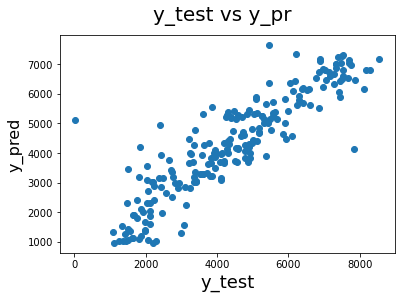

In [102]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pr', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [103]:
# Hence based on above graph variance for above graph of the error terms (residuals) is constant across prediction
# i.e Error terms doesn't vary much as the value of the predicator variable changes.

In [104]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label


##  7.7 Plot error terms for test data


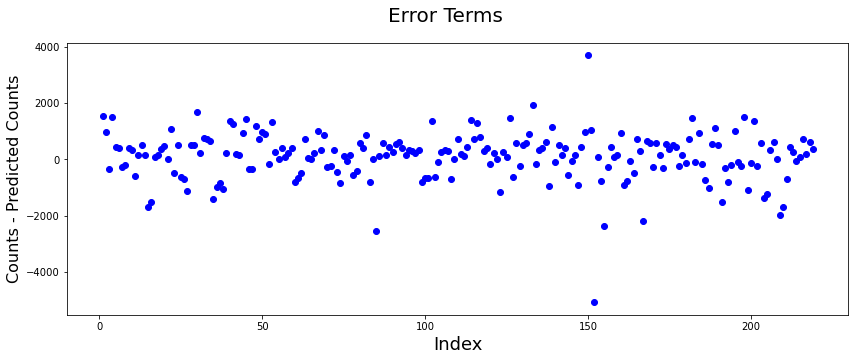

In [105]:
plot_err_terms(y_test,y_pred_test)


# As in the above graph erorr terms are randomly distibuted 
# Hence output shows well by the model 
# there are no paramters that can explain the model better.


# Interpreting the Results

# 
# Hence we can conclude the final model
# The company should focus on the follwing features
# . Company should focus on bussines when hum and windspeed are high by providing safety 
# . Based on data it expected to have a boom in  number of users once situation comes back to normal.
# . There would be less bookings during weathersit_Mist_cloudy, they could probably use this time to serive the bikes without having business impact.
# . Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best.
# Conclusion: 
# . When tempearture is good there are high no of rental bikes
# . Hum and windspeed is high count is less
# . sat and has high sales of bike rental
# . temp has high correlation and taking bike rental demand is going high are good at that time
# . spring , mnth _nov and mnth_dec has there are less demand
# . mnth_sep, season winter has bit demand of bikes


# . Significant variables to predict the demand for shared bikes

# . Working day
# . temp
# . hum
# . windspeed
# . Season (Spring, Winter)
# . Month (Dec, Sep, Nov)
# . Weatherist_mist_cloudy
